In [10]:
import pandas as pd
import  matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("../../data/processed/Roommate_Compatibility_Survey.csv")
# Adding an 'id' column with unique IDs
df['id'] = range(1, len(df) + 1)
df.head()

,Concern_Obnoxious,Concern_LoudMusicTV,Concern_LoudWhenStudyingSleeping,Concern_EatingMyFood,Concern_NotPickingUpAfterThemselves,Concern_Unfriendly,Concern_LackOfRespect,Concern_NotOpenMinded,Concern_BadHygiene,Concern_UsingMyThings,...,Ideal_Study_Environment_Description_encoded,Attitude_towards_Borrowing_Sharing,Description_of_Personal_Room_At_Home_encoded,Desired_Room_Attributes_encoded,Expected_Study_Time_Preference_encoded,Study_Time_Preference,Conflict_Handling_Method_encoded,Communication_Preference_with_Roommate,Age_normalized,id
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,1,3,0,1.062484,1
1,0,0,0,0,1,0,1,0,1,1,...,2,0,0,0,1,1,0,0,-0.505216,2
2,1,1,0,0,1,0,1,0,0,0,...,2,0,3,0,1,2,0,0,1.062484,3
3,1,0,0,0,1,1,1,0,0,0,...,2,0,0,0,1,0,0,0,0.278634,4
4,1,0,0,0,1,0,1,0,0,0,...,2,1,3,0,0,1,3,0,-0.505216,5


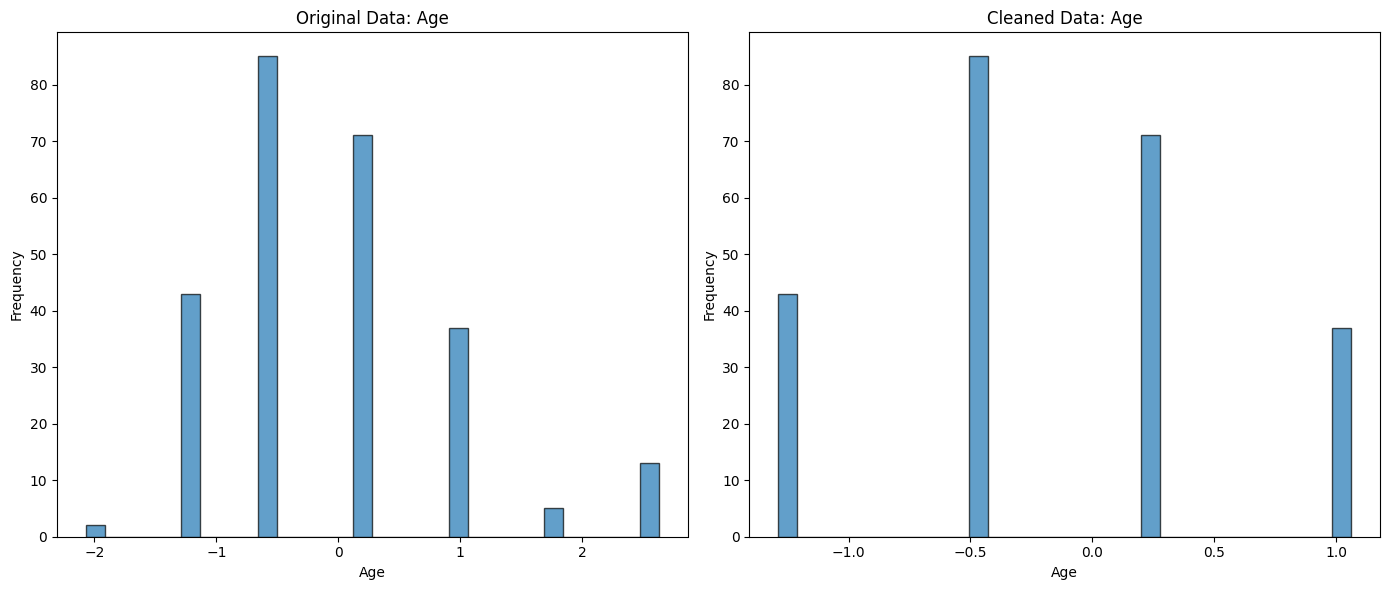

In [21]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return cleaned_df

# Remove outliers from the 'age' column
df_clean = remove_outliers(df, 'Age_normalized')

# Visualize original data and cleaned data for the 'age' column
plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
plt.hist(df['Age_normalized'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Original Data: Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Cleaned data
plt.subplot(1, 2, 2)
plt.hist(df_clean['Age_normalized'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Cleaned Data: Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
df_clean.head()

,Concern_Obnoxious,Concern_LoudMusicTV,Concern_LoudWhenStudyingSleeping,Concern_EatingMyFood,Concern_NotPickingUpAfterThemselves,Concern_Unfriendly,Concern_LackOfRespect,Concern_NotOpenMinded,Concern_BadHygiene,Concern_UsingMyThings,...,Ideal_Study_Environment_Description_encoded,Attitude_towards_Borrowing_Sharing,Description_of_Personal_Room_At_Home_encoded,Desired_Room_Attributes_encoded,Expected_Study_Time_Preference_encoded,Study_Time_Preference,Conflict_Handling_Method_encoded,Communication_Preference_with_Roommate,Age_normalized,id
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,1,3,0,1.062484,1
1,0,0,0,0,1,0,1,0,1,1,...,2,0,0,0,1,1,0,0,-0.505216,2
2,1,1,0,0,1,0,1,0,0,0,...,2,0,3,0,1,2,0,0,1.062484,3
3,1,0,0,0,1,1,1,0,0,0,...,2,0,0,0,1,0,0,0,0.278634,4
4,1,0,0,0,1,0,1,0,0,0,...,2,1,3,0,0,1,3,0,-0.505216,5


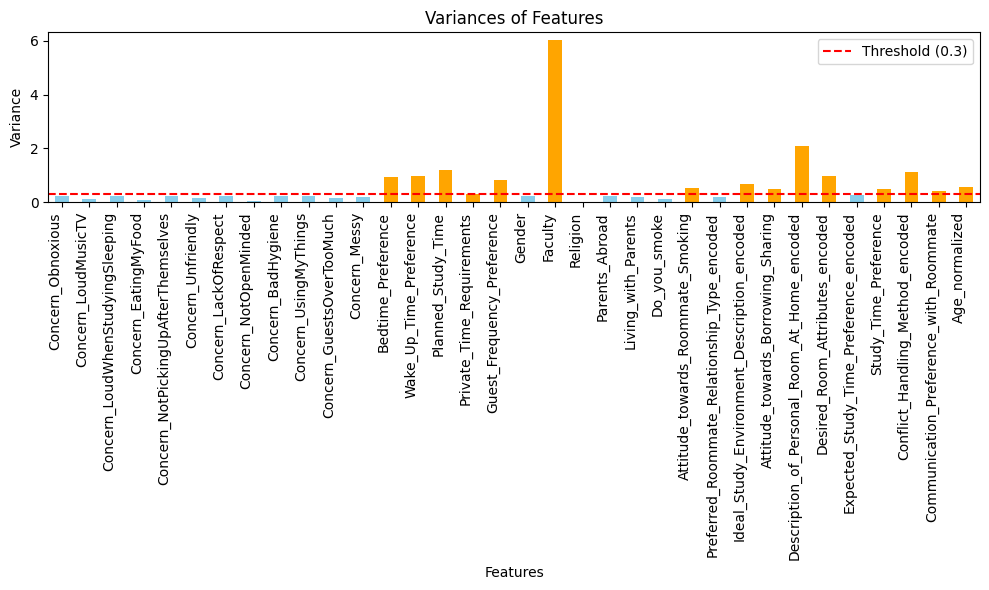

In [23]:
import matplotlib.pyplot as plt

# Define the threshold
threshold = 0.3 # Adjust the threshold as needed

# Calculate variances of the features
variances = df_clean.iloc[:, :-1].var()

# Plot the variances
plt.figure(figsize=(10, 6))
variances.plot(kind='bar', color=['skyblue' if var < threshold else 'orange' for var in variances])
plt.title('Variances of Features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=90, ha='right')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
# Define the threshold
threshold = 0.3

variances = df_clean.var()

low_threshold_columns = variances[variances < threshold]
high_threshold_columns = variances[variances >= threshold]

print("Columns with variances below the threshold (<", threshold, "):")
print(low_threshold_columns)

print("\nColumns with variances equal to or above the threshold (>= ", threshold, "):")
print(high_threshold_columns)


Columns with variances below the threshold (< 0.3 ):
Concern_Obnoxious                               0.244555
Concern_LoudMusicTV                             0.132762
Concern_LoudWhenStudyingSleeping                0.243112
Concern_EatingMyFood                            0.105013
Concern_NotPickingUpAfterThemselves             0.243851
Concern_Unfriendly                              0.170123
Concern_LackOfRespect                           0.238875
Concern_NotOpenMinded                           0.036837
Concern_BadHygiene                              0.231428
Concern_UsingMyThings                           0.243851
Concern_GuestsOverTooMuch                       0.162712
Concern_Messy                                   0.190408
Gender                                          0.247530
Religion                                        0.020826
Parents_Abroad                                  0.243112
Living_with_Parents                             0.211233
Do_you_smoke                       

In [27]:
filtered_df = df_clean[high_threshold_columns.index]
filtered_df.head()

,Bedtime_Preference,Wake_Up_Time_Preference,Planned_Study_Time,Private_Time_Requirements,Guest_Frequency_Preference,Faculty,Attitude_towards_Roommate_Smoking,Ideal_Study_Environment_Description_encoded,Attitude_towards_Borrowing_Sharing,Description_of_Personal_Room_At_Home_encoded,Desired_Room_Attributes_encoded,Study_Time_Preference,Conflict_Handling_Method_encoded,Communication_Preference_with_Roommate,Age_normalized,id
0,1.0,4.0,2.0,1.0,1.0,1,2,2,0,0,0,1,3,0,1.062484,1
1,3.0,1.0,1.0,2.0,4.0,1,2,2,0,0,0,1,0,0,-0.505216,2
2,3.0,1.0,2.0,2.0,3.0,1,0,2,0,3,0,2,0,0,1.062484,3
3,3.0,0.0,3.0,0.0,2.0,1,2,2,0,0,0,0,0,0,0.278634,4
4,3.0,3.0,3.0,1.0,1.0,1,1,2,1,3,0,1,3,0,-0.505216,5


In [28]:
filtered_df.columns


Index(['Bedtime_Preference', 'Wake_Up_Time_Preference', 'Planned_Study_Time',
       'Private_Time_Requirements', 'Guest_Frequency_Preference', 'Faculty',
       'Attitude_towards_Roommate_Smoking',
       'Ideal_Study_Environment_Description_encoded',
       'Attitude_towards_Borrowing_Sharing',
       'Description_of_Personal_Room_At_Home_encoded',
       'Desired_Room_Attributes_encoded', 'Study_Time_Preference',
       'Conflict_Handling_Method_encoded',
       'Communication_Preference_with_Roommate', 'Age_normalized', 'id'],
      dtype='object')

In [29]:
# Checking the number of rows and columns

num_rows, num_columns = filtered_df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")

Number of Rows: 236
Number of Columns: 16



In [30]:
filtered_df.to_csv('../../data/final/Roommate_Compatibility_Survey.csv', index=False)